<a href="https://colab.research.google.com/github/Ruksy/Pulsars/blob/master/High_Time_Resolution_Pulsars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.52.34.130:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.52.34.130:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.52.34.130:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HTRU_2.csv to HTRU_2.csv
User uploaded file "HTRU_2.csv" with length 1730114 bytes


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df

import seaborn as sns
%matplotlib inline


import csv

# New Section

In [8]:


Data  = pd.read_csv('HTRU_2.csv')

Data.columns

df = pd.read_csv('HTRU_2.csv')




In [9]:
print(df.shape)

(17897, 9)


In [10]:
df.columns

Index(['140.5625', '55.68378214', '-0.234571412', '-0.699648398',
       '3.199832776', '19.11042633', '7.975531794', '74.24222492', '0'],
      dtype='object')

In [11]:
df.corr()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
140.5625,1.000000,0.547099,-0.873899,-0.738780,-0.298832,-0.307005,0.234345,0.144057,-0.673187
55.68378214,0.547099,1.000000,-0.521418,-0.539792,0.006893,-0.047606,0.029436,0.027714,-0.363704
-0.234571412,-0.873899,-0.521418,1.000000,0.945730,0.414362,0.432873,-0.341216,-0.214505,0.791592
-0.699648398,-0.738780,-0.539792,0.945730,1.000000,0.412052,0.415135,-0.328846,-0.204790,0.709526
3.199832776,-0.298832,0.006893,0.414362,0.412052,1.000000,0.796554,-0.615974,-0.354276,0.400873
19.11042633,-0.307005,-0.047606,0.432873,0.415135,0.796554,1.000000,-0.809791,-0.575809,0.491532
7.975531794,0.234345,0.029436,-0.341216,-0.328846,-0.615974,-0.809791,1.000000,0.923744,-0.390819
74.24222492,0.144057,0.027714,-0.214505,-0.204790,-0.354276,-0.575809,0.923744,1.000000,-0.259123
0,-0.673187,-0.363704,0.791592,0.709526,0.400873,0.491532,-0.390819,-0.259123,1.000000


In [12]:
def plot_corr(df, size=1000):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

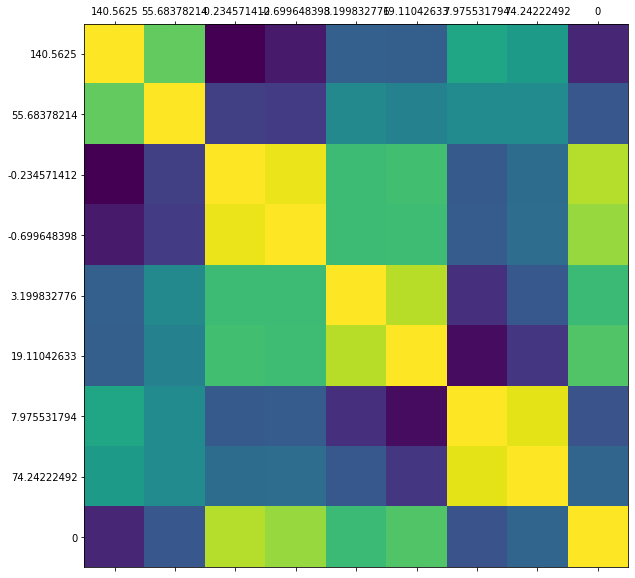

In [13]:
plot_corr(df)

In [14]:
df.dtypes

140.5625        float64
55.68378214     float64
-0.234571412    float64
-0.699648398    float64
3.199832776     float64
19.11042633     float64
7.975531794     float64
74.24222492     float64
0                 int64
dtype: object

In [ ]:
df.dropna()
df.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [15]:
# Getting the X_data

X_data = df.iloc[:,0: -1].values
X_data[0:60]

array([[ 1.02507812e+02,  5.88824300e+01,  4.65318154e-01,
        -5.15087909e-01,  1.67725752e+00,  1.48601457e+01,
         1.05764867e+01,  1.27393580e+02],
       [ 1.03015625e+02,  3.93416494e+01,  3.23328365e-01,
         1.05116443e+00,  3.12123746e+00,  2.17446687e+01,
         7.73582202e+00,  6.31719091e+01],
       [ 1.36750000e+02,  5.71784487e+01, -6.84146380e-02,
        -6.36238369e-01,  3.64297659e+00,  2.09592803e+01,
         6.89649891e+00,  5.35936607e+01],
       [ 8.87265625e+01,  4.06722254e+01,  6.00866079e-01,
         1.12349169e+00,  1.17892977e+00,  1.14687196e+01,
         1.42695728e+01,  2.52567306e+02],
       [ 9.35703125e+01,  4.66981135e+01,  5.31904850e-01,
         4.16721117e-01,  1.63628763e+00,  1.45450743e+01,
         1.06217484e+01,  1.31394004e+02],
       [ 1.19484375e+02,  4.87650593e+01,  3.14602200e-02,
        -1.12167573e-01,  9.99163880e-01,  9.27961224e+00,
         1.92062302e+01,  4.79756567e+02],
       [ 1.30382812e+02,  3.984405

In [16]:
Y_data = df.iloc[:, -1].values
Y_data[0: 50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_data = scaler.fit_transform(X_data)
X_data[0:80]

array([[-3.34106982e-01,  1.80237928e+00, -1.18219918e-02,
        -3.70549173e-01, -3.71110424e-01, -5.88930618e-01,
         5.04408854e-01,  2.11559965e-01],
       [-3.14310758e-01, -1.05327065e+00, -1.45267732e-01,
        -1.16612503e-01, -3.22116800e-01, -2.35343197e-01,
        -1.25996658e-01, -3.91379493e-01],
       [ 1.00076760e+00,  1.55336292e+00, -5.13438115e-01,
        -3.90191311e-01, -3.04414413e-01, -2.75680556e-01,
        -3.12260777e-01, -4.81304029e-01],
       [-8.71346031e-01, -8.58822982e-01,  1.15569515e-01,
        -1.04886075e-01, -3.88018473e-01, -7.63113435e-01,
         1.32398528e+00,  1.38674239e+00],
       [-6.82520515e-01,  2.17880509e-02,  5.07579373e-02,
        -2.19474869e-01, -3.72500515e-01, -6.05112611e-01,
         5.14453405e-01,  2.49117598e-01],
       [ 3.27695997e-01,  3.23847299e-01, -4.19573095e-01,
        -3.05223653e-01, -3.94117853e-01, -8.75545454e-01,
         2.41953730e+00,  3.51968862e+00],
       [ 7.52553409e-01, -9.798500

In [19]:
#Splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


In [21]:
# Importing libraries for ANN creation
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import binary_crossentropy
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

from keras.optimizers import SGD

Epoch 1/34
    1/11453 [..............................] - ETA: 14:43 - loss: 0.7048 - accuracy: 0.0000e+00WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0006s vs `on_train_batch_end` time: 0.0054s). Check your callbacks.


11448/11453 [============================>.] - ETA: 0s - loss: 0.1142 - accuracy: 0.9661WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0005s vs `on_test_batch_end` time: 0.0026s). Check your callbacks.


11453/11453 [==============================] - 96s 8ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.0916 - val_accuracy: 0.9791
Epoch 2/34
11453/11453 [==============================] - 101s 9ms/step - loss: 0.0772 - accuracy: 0.9804 - val_loss: 0.0849 - val_accuracy: 0.9766
Epoch 3/34
11453/11453 [==============================] - 98s 9ms/step - loss: 0.0727 - accuracy: 0.9800 - val_loss: 0.0832 - val_accuracy: 0.9777
Epoch 4/34
11453/11453 [==============================] - 97s 9ms/step - loss: 0.0711 - accuracy: 0.9812 - val_loss: 0.0776 - val_accuracy: 0.9791
Epoch 5/34
11453/11453 [==============================] - 100s 9ms/step - loss: 0.0696 - accuracy: 0.9808 - val_loss: 0.0785 - val_accuracy: 0.9801
Epoch 6/34
11453/11453 [==============================] - 104s 9ms/step - loss: 0.0685 - accuracy: 0.9817 - val_loss: 0.0775 - val_accuracy: 0.9780
Epoch 7/34
11453/11453 [==============================] - 96s 8ms/step - loss: 0.0692 - accuracy: 0.9813 - val_loss: 0.0754 - 

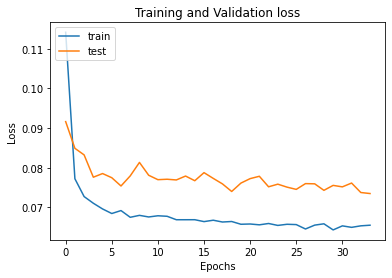

In [22]:
#Building ANN

model = keras.Sequential([
    keras.layers.Dense(10 , input_dim = 8   , activation='relu'),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_val, y_val))

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,34)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

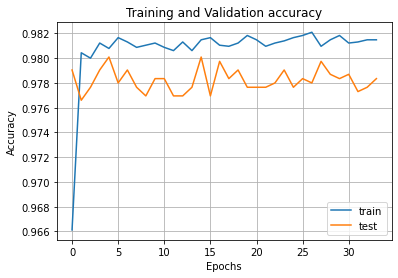

In [23]:

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,34)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.show()

In [24]:
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
X_pred = np.array([df.iloc[1,:-1]])
print(X_pred)

[[103.015625    39.34164944   0.32332837   1.05116443   3.12123746
   21.74466875   7.73582202  63.17190911]]


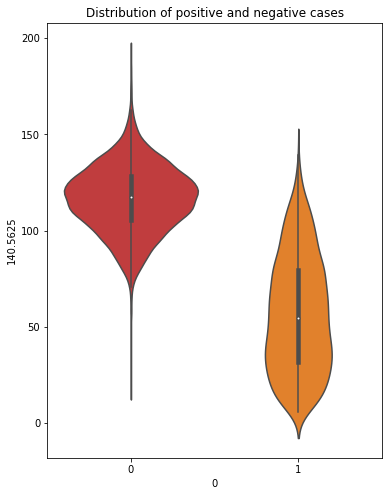

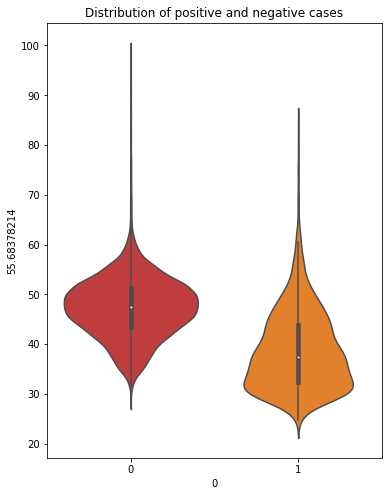

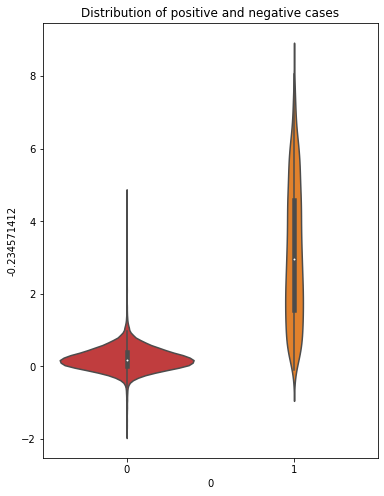

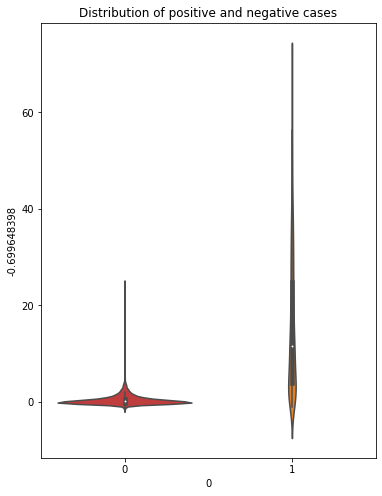

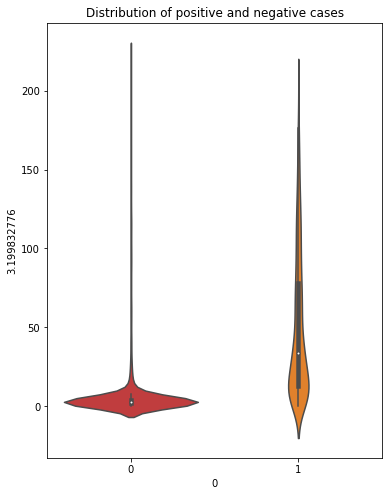

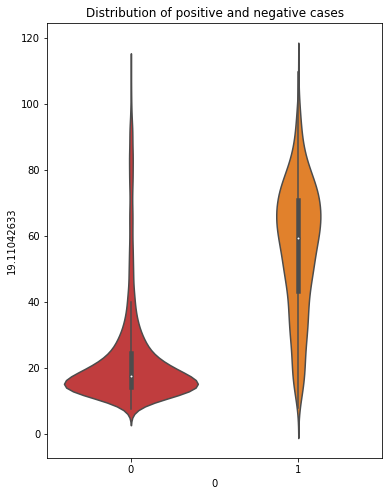

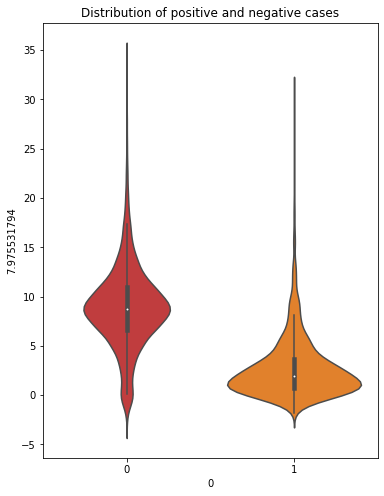

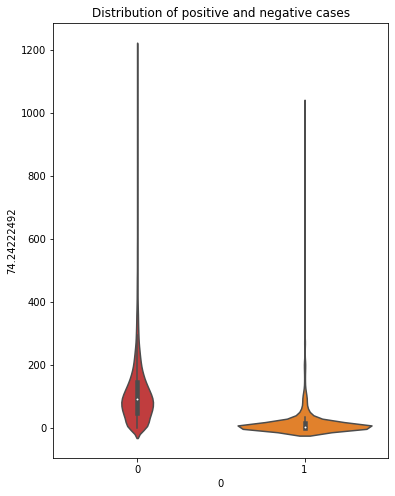

In [27]:

for i in range(8):
    fig = plt.figure(figsize = (6,8))
    fig = sns.violinplot(data = df, x = df.columns[-1], y = df.columns[i], palette = {0: 'tab:red', 1: 'tab:orange'})
    fig.set_title('Distribution of positive and negative cases')
    plt.show()